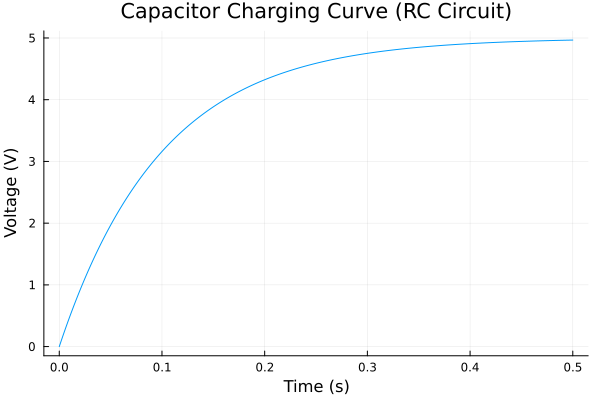

In [1]:
using Plots

# Define parameters
R = 1e3          # Resistance in ohms (1 kΩ)
C = 100e-6       # Capacitance in farads (100 μF)
Vₐ = 5.0         # Input voltage in volts
τ = R * C        # Time constant (τ = RC)

# Define time vector
t = range(0, 5τ, length=1000)  # Time from 0 to 5τ

# Voltage across the capacitor during charging
Vₓ = Vₐ .* (1 .- ℯ .^ (-t ./ τ))  # ℯ represents Euler's number

# Plot the charging curve
plot(t, Vₓ,
     xlabel="Time (s)",
     ylabel="Voltage (V)",
     title="Capacitor Charging Curve (RC Circuit)",
     legend=false,
     grid=true)

The **impulse response** of a system is the inverse Laplace transform of its transfer function $ H(s) $. For a **low-pass RC filter**, the transfer function is:

$
H(s) = \frac{1}{1 + RCs}.
$

---

### Step 1: Transfer Function in Time Domain
The impulse response $ h(t) $ is the inverse Laplace transform of $ H(s) $. For $ H(s) $:
$
H(s) = \frac{1}{1 + RCs}.
$

Using the Laplace transform table:
$
\mathcal{L}^{-1}\left\{\frac{1}{1 + RCs}\right\} = \frac{1}{RC} e^{-t / (RC)} \quad \text{for } t \geq 0.
$

Thus, the impulse response is:
$
h(t) = \frac{1}{RC} e^{-t / (RC)} \quad \text{for } t \geq 0.
$

---

### Step 2: Substitute $ R $ and $ C $
From the given circuit:
- $ R = 160 \, \Omega $,
- $ C = 10 \, \mu\text{F} = 10 \times 10^{-6} \, \text{F} $.

The time constant is:
$
\tau = RC = (160)(10 \times 10^{-6}) = 0.0016 \, \text{s}.
$

Substitute $ \tau $ into $ h(t) $:
$
h(t) = \frac{1}{\tau} e^{-t / \tau} = \frac{1}{0.0016} e^{-t / 0.0016}.
$

Simplify:
$
h(t) = 625 e^{-625t} \quad \text{for } t \geq 0.
$

---

### Final Impulse Response:
The impulse response of the circuit is:
$
h(t) = 625 e^{-625t}, \quad t \geq 0.
$

---

### Interpretation:
- The impulse response $ h(t) $ describes how the circuit reacts to an impulse input.
- The exponential decay reflects the filtering property of the low-pass filter, which allows low-frequency components to pass and attenuates high-frequency components.


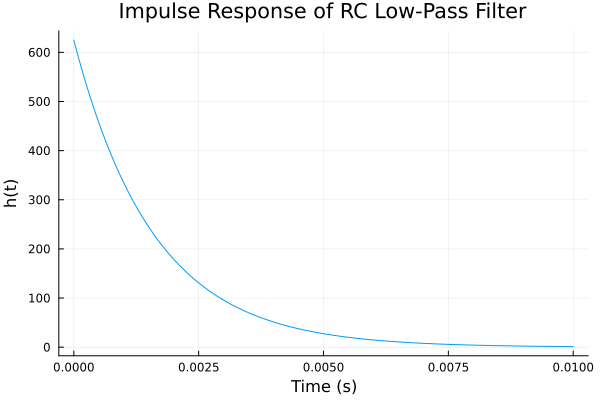

In [2]:
using Plots

# Define parameters
τ = 0.0016  # Time constant (RC)
h(t) = 625 * ℯ^(-625 * t)  # Impulse response

# Time vector
t = range(0, 0.01, length=1000)  # From 0 to 10ms

# Plot impulse response
plot(t, h.(t),
     xlabel="Time (s)",
     ylabel="h(t)",
     title="Impulse Response of RC Low-Pass Filter",
     legend=false,
     grid=true)


5T = 0.042361111111111106


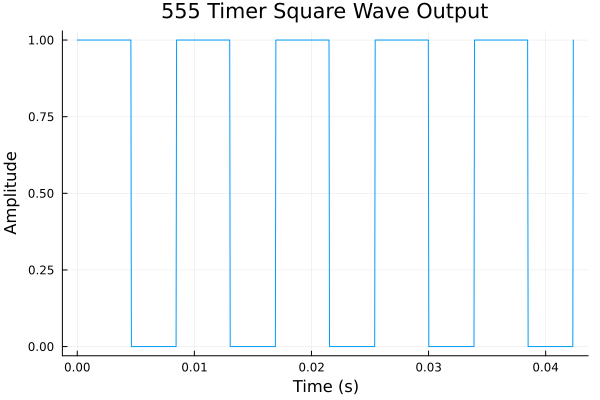

In [3]:
using Plots

# Define parameters
R₁ = 1e3  # Resistor R₁ in ohms (1 kΩ)
R₂ = 5.6e3  # Resistor R₂ in ohms (5.6 kΩ)
C = 1e-6  # Capacitor in farads (1 μF)

# Frequency and duty cycle
f = 1.44 / ((R₁ + 2R₂) * C)  # Frequency in Hz
T = 1 / f; @show 5T  # Period in seconds
D = (R₁ + R₂) / (R₁ + 2R₂)  # Duty cycle (as a fraction)

# Generate time vector
t = range(0, 5T, length=1000)  # Time vector

# Generate square wave using element-wise broadcasting
ω = @. ifelse(mod(t, T) < D * T, 1.0, 0.0)

# Plot the square wave
plot(t, ω
    , xlabel="Time (s)", ylabel="Amplitude"
    , title="555 Timer Square Wave Output"
    , legend=false, grid=true
)